# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import requests
import time

url = "https://es.wikipedia.org/wiki/Leucocito"

response = requests.get(url, time.sleep(10))

if response.status_code == 403:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    response = request





In [9]:
from bs4 import BeautifulSoup
import pandas as pd

soup = BeautifulSoup(response.text, 'html')

tables = soup.find_all("table", class_="wikitable")

for index, table in enumerate(tables):
    if ("Porcentaje aproximado en adultos" in str(table)):
        table_index = index
        break

leuco_df = pd.DataFrame(columns = ["Leucocito", "Porcentaje"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Leucocito = col[0].text
        Porcentaje = col[3].text.replace('%','')
        leuco_df = pd.concat([leuco_df, pd.DataFrame({
            "Leucocito": Leucocito,
            "Porcentaje": Porcentaje
        }, index = [0])], ignore_index = True)

leuco_df

,Leucocito,Porcentaje
0,Neutrófilo,62
1,Eosinófilo,2.3
2,Basófilo,0.4
3,Linfocito,30
4,Monocito,5.3


In [23]:
import sqlite3

connection = sqlite3.connect("Leucocitos.db")

cursor = connection.cursor()
cursor.execute("""CREATE TABLE Leucocitos (Leucocito, Porcentaje)""")

In [19]:
leuco_tuples = list(leuco_df.to_records(index = False))
cursor.executemany("INSERT INTO Leucocitos VALUES (?,?)", leuco_tuples)
connection.commit()
connection.close()

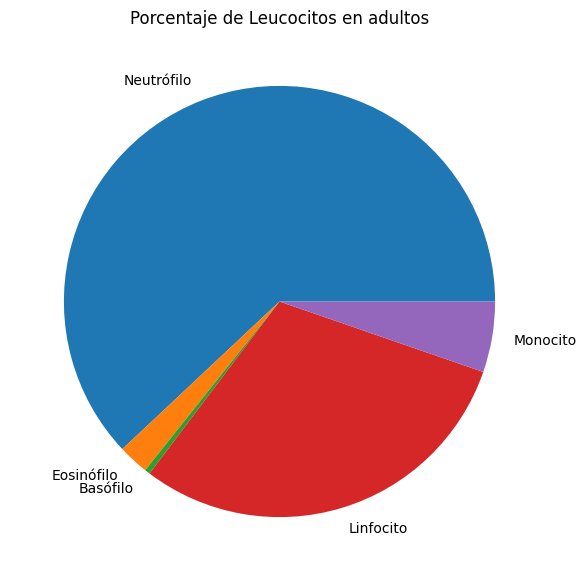

In [11]:
import matplotlib.pyplot as plt


labels = leuco_df['Leucocito']
sizes = leuco_df['Porcentaje']

plt.figure(figsize = (7, 7))

plt.pie(sizes, labels = labels)

plt.title("Porcentaje de Leucocitos en adultos")
plt.show()